# Create Group Report

Notes on data files:
- THO: 5 additional sessions not converted
- THF: 3 additional sessions not converted

In [1]:
%config Completer.use_jedi = False

In [2]:
from pathlib import Path

import numpy as np

from pynwb import NWBHDF5IO
from convnwb.io import get_files

from spiketools.plts.data import plot_hist
from spiketools.plts.utils import make_axes

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Set which task to analyze
task = 'THO'

In [5]:
# Define the base data folder
data_folder = Path('/Users/tom/Documents/Data/JacobsLab/TH/' + task)

In [6]:
# Get the list of 
nwbfiles = get_files(data_folder / 'NWB')

## Collect Summary Information

In [7]:
# Define summary data to collect
summary = {
    'ids' : [],
    'n_trials' : [],
    'n_units' : [],
    'error' : [],
    'correct' : []
}

In [8]:
for nwbfile in nwbfiles:
    
    # Load NWB file
    io = NWBHDF5IO(str(data_folder / 'NWB' / nwbfile), 'r')
    nwbfile = io.read()

    # Get the subject & session ID from file
    subj_id = nwbfile.subject.subject_id
    session_id = nwbfile.session_id
    
    # Collect summary information
    summary['ids'].append(session_id)
    summary['n_trials'].append(len(nwbfile.trials))
    summary['n_units'].append(len(nwbfile.units))
    
    summary['error'].append(np.mean(nwbfile.trials.error[:]))
    summary['correct'].append(np.mean(nwbfile.trials.correct[:]))

## Reports

In [9]:
n_sessions = len(summary['ids'])
print('Number of available sessions: {}'.format(n_sessions))

Number of available sessions: 8


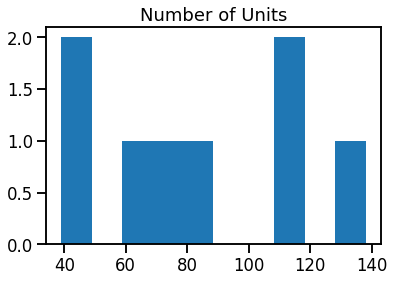

In [10]:
plot_hist(summary['n_units'], title='Number of Units')

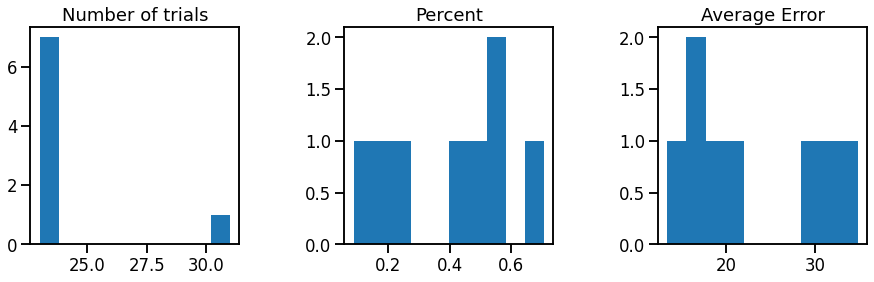

In [11]:
axes = make_axes(3, 3, figsize=(15, 4), wspace=0.5)
plot_hist(summary['n_trials'], title='Number of trials', ax=axes[0])
plot_hist(summary['correct'], title='Percent', ax=axes[1])
plot_hist(summary['error'], title='Average Error', ax=axes[2])

## Check individual sessions

In [12]:
# Print out detailed information for each session
strtemp = "{}: {:3d} units, {:3d} trials ({:1.2f}% correct, average error of {:2.2f})"
for ind in range(n_sessions):
    print(strtemp.format(summary['ids'][ind], summary['n_units'][ind],
                         summary['n_trials'][ind], summary['correct'][ind] * 100,
                         summary['error'][ind]))

wv001-session_0: 111 units,  23 trials (53.45% correct, average error of 15.80)
wv001-session_2: 118 units,  23 trials (46.55% correct, average error of 18.20)
wv002-session_2:  59 units,  23 trials (21.05% correct, average error of 32.28)
wv003-session_0:  39 units,  23 trials (8.77% correct, average error of 34.85)
wv003-session_1:  47 units,  23 trials (22.41% correct, average error of 29.95)
wv004-session_0: 138 units,  31 trials (55.84% correct, average error of 16.81)
wv004-session_1:  78 units,  23 trials (70.69% correct, average error of 13.33)
wv004-session_2:  83 units,  23 trials (45.61% correct, average error of 21.13)
